In [119]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
#%autoreload 2
from Aurel_variable import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
# Lecture du fichier csv
df_brut = pd.read_csv('p2-arbres-fr.csv', delimiter = ';')
# Suppression des colonnes inutiles
df_brut.drop(columns=['type_emplacement', 'numero', 'id_emplacement', 'complement_addresse'], inplace=True)
df = df_brut.copy()

Nombre d'arbre par arrondissement

In [121]:
# Création d'une copie du dataframe brut
df_count = df.copy()
# Filtre des arbres dans Paris intr-muros
df_count = df_count.loc[df_count['arrondissement'].str.contains('PARIS')]
# Application d'une fonction qui va garder seulement le numéro de l'arrondissement
df_count['arrondissement'] = df_count['arrondissement'].apply(extraire_chiffres)
# Decompte des arbres par arrondissement mis sous forme de dataframe dont la colonne se nomme nb_arbre
df_count = df_count['arrondissement'].value_counts().to_frame(name='nb_arbre')

Nombre d'habitant par arrondissement

In [122]:
# Lecture du dictionnaire population_paris mis sous forme de dataframe
df_personne = pd.DataFrame(population_paris, index=['nb_habitant'])
# Transposition du dataframe
df_personne = df_personne.T
# Application d'une fonction qui va garder seulement le numéro de l'arrondissement
df_personne.index = df_personne.index.map(extraire_chiffres)

Superficie par arrondissement

In [123]:
# Lecture du dictionnaire superficie_paris mis sous forme de dataframe
df_superficie = pd.DataFrame(superficie_paris, index=['superficie'])
# Transposition du dataframe
df_superficie = df_superficie.T
# Application d'une fonction qui va garder seulement le numéro de l'arrondissement
df_superficie.index = df_superficie.index.map(extraire_chiffres)

Merge des differents dataframe par leurs index qui est l'arrondissement

In [124]:
# Merge des dataframe de comptage des arbres et de population par arrondissement
df_merged = pd.merge(df_count, df_personne, left_index=True, right_index=True)
# Merge des dataframe avec celui sur les superficies
df_merged = pd.merge(df_merged, df_superficie, left_index=True, right_index=True)
# Suppression de l'arrondissement en tant qu'index en nommant cette colonne correctement
df_merged = df_merged.reset_index(names="arrondissement")

Ajout des nouvelles colonnes

In [125]:
# Nombre d'arbres pour 1000 habitants
df_merged['arbre_habitant'] = (df_merged['nb_arbre'] / df_merged['nb_habitant'] * 1000).astype(int)
# Nombre d'arbre par km²
df_merged['arbre_superficie'] = (df_merged['nb_arbre'] / df_merged['superficie']).astype(int)

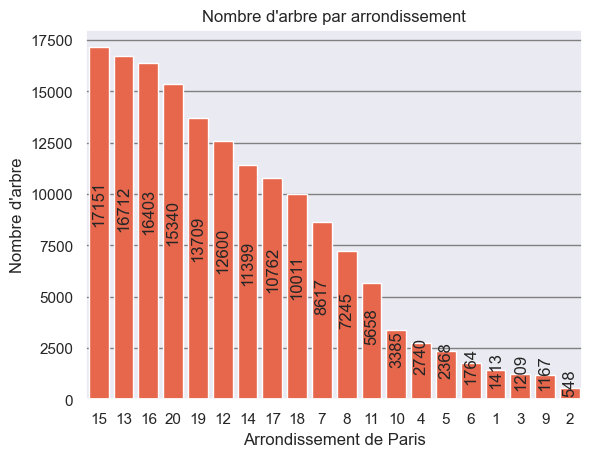

In [126]:
# Tracé du graphe
sns.barplot(data=df_merged, x='arrondissement', y='nb_arbre', color="#FF5733")
sns.set_theme(style="dark", palette="pastel")
plt.title("Nombre d'arbre par arrondissement")
plt.grid(axis="y", color="grey")
plt.ylabel("Nombre d'arbre")
plt.xlabel("Arrondissement de Paris")

# Ajout des valeurs sur chacune des barres
for index, row in df_merged.iterrows():
    plt.text(row['arrondissement'], row['nb_arbre'] / 2, int(row['nb_arbre']), ha="center", rotation=90)

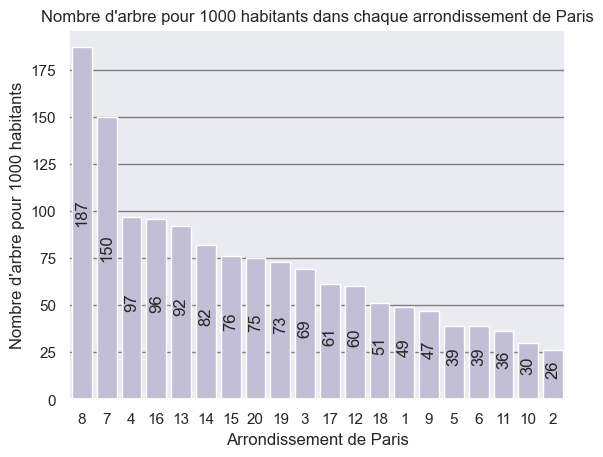

In [127]:
# Mise en forme du dataframe pour ordonner correctement les barres
df_merged_sorted = df_merged.sort_values(by='arbre_habitant', ascending=False)

# Tracé du graphe
sns.barplot(data=df_merged_sorted, x='arrondissement', y='arbre_habitant', color="#BEBADA")
sns.set_theme(style="dark", palette="pastel")
plt.title("Nombre d'arbre pour 1000 habitants dans chaque arrondissement de Paris")
plt.grid(axis="y", color="grey")
plt.ylabel("Nombre d'arbre pour 1000 habitants")
plt.xlabel("Arrondissement de Paris")

# Ajout des valeurs sur chacune des barres
for index, row in df_merged_sorted.iterrows():
    plt.text(row['arrondissement'], row['arbre_habitant'] / 2, int(row['arbre_habitant']), ha="center", rotation=90)

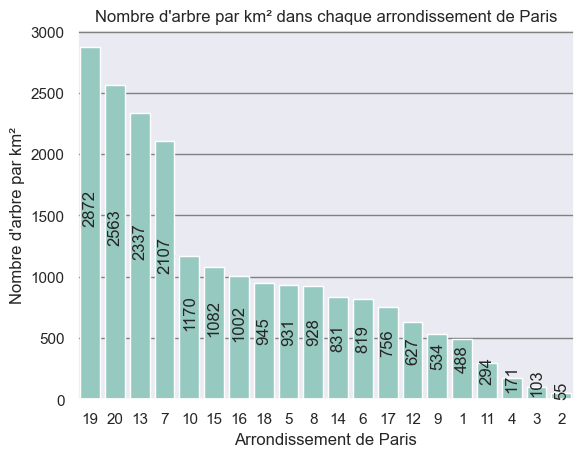

In [128]:
# Mise en forme du dataframe pour ordonner correctement les barres
df_merged_sorted = df_merged.sort_values(by='arbre_superficie', ascending=False)

# Tracé du graphe
sns.barplot(data=df_merged_sorted, x='arrondissement', y='arbre_superficie', color="#8DD3C7")
sns.set_theme(style="dark", palette="pastel")
plt.title("Nombre d'arbre par km² dans chaque arrondissement de Paris")
plt.grid(axis="y", color="grey")
plt.ylabel("Nombre d'arbre par km²")
plt.xlabel("Arrondissement de Paris")

# Ajout des valeurs sur chacune des barres
for index, row in df_merged_sorted.iterrows():
    plt.text(row['arrondissement'], row['arbre_superficie'] / 2, int(row['arbre_superficie']), ha="center", rotation=90)